<a href="https://colab.research.google.com/github/lmh78v/data/blob/main/%EA%B3%B5%EA%B3%B5%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%EA%B3%BC%EC%A0%9C(%ED%83%80%EB%B8%94%EB%9D%BC%EB%9D%BC%EC%82%AC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

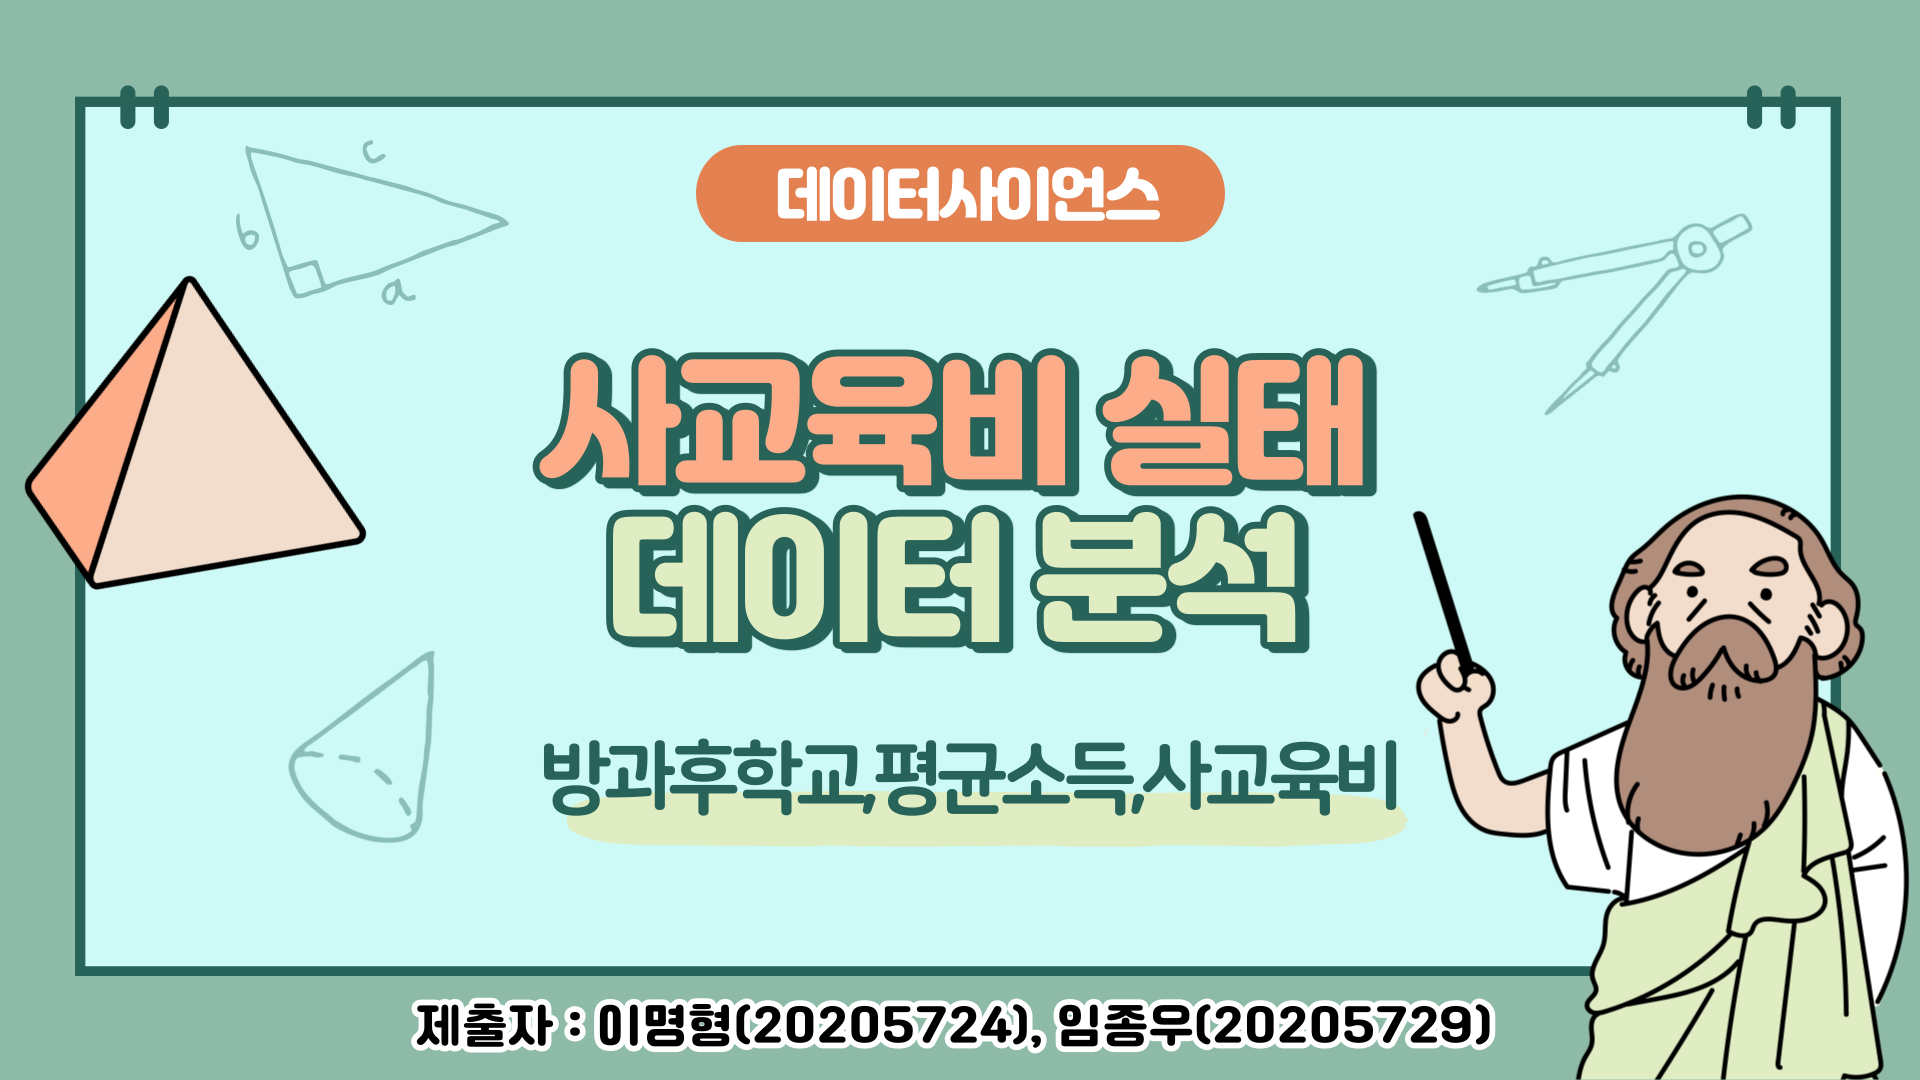

> ## 도입
+ 최근 소득의 양극화가 심화되고 있으며 이는 학력 격차라는 사회 문제를 야기하고 있다.
+ 학력 격차를 최소화하기 위해 공교육 내실화를 위한 다양한 정책이 국가적인 차원에서 추진되고 있다.
+ 정부는 방과후학교 프로그램 운영을 통해 공교육을 통한 학력 격차 완화를 실현하고 각 가정의 사교육비를 최소화하기 위해 노력하고 있다.
+ **하지만** 공교육의 방과후학교 프로그램은 사교육에 비해 부실하다는 인식이 강하다. 더불어 '부모의 소득이 낮아서 사교육을 받지 못하는 학생들이 방과후학교에 주로 참여하고 있다'라는 인식이 널리 퍼져있다.
+ 본 보고서에서는 소득격차와 방과후학교 프로그램 참여도의 상관관계를 분석하여 위의 인식(가정, assumption)에 대한 타당성을 통계학적으로 검증하고자 한다. **(과제1)**
+ 또한 평균소득과 사교육비의 상관관계를 선형회귀와 평균제곱오차를 사용하여 통계학적으로 분석함으로써 공교육을 통한 교육격차 완화 정책이 얼마나 효과를 거두고 있는지 확인하고자 한다.   **(과제2)**

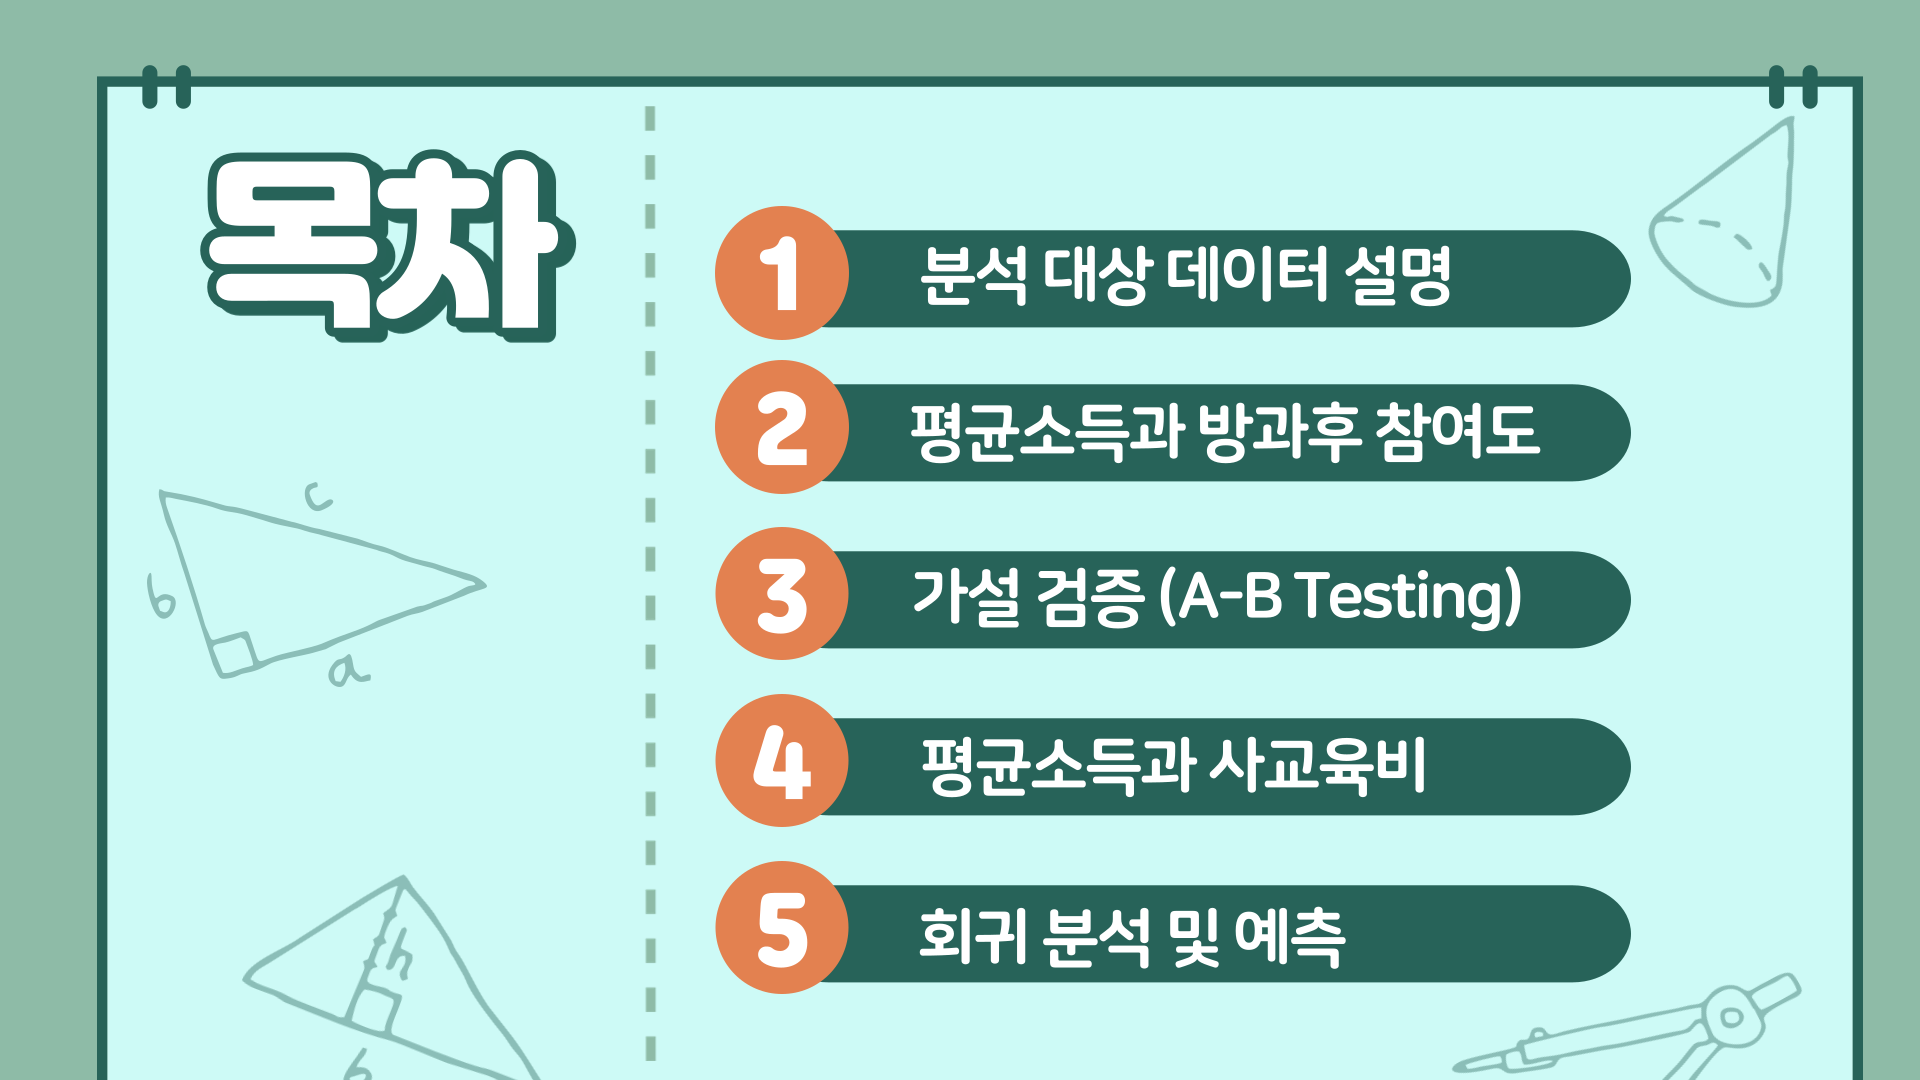

> ## 분석 대상 데이터 설명
+ 2020년 통계청에서 조사한 초,중,고 사교육비 실태 조사 자료이다.
+ 원데이터에서 다음의 조건을 모두 충족하는 자료만을 추출했다.
 - 자녀의 수가 3명 이하인 사례
 - 모친이 있는 사례
+ 데이터 테이블의 각 열은 다음과 같다.
 - admin : 지역구역(1 서울, 2 광역시, 3 중소도시, 읍면지역)
 - region : 지역구분(11 서울, 21 부산, 22 대구, 23 인천, 24 광주, 25 대전, 26 울산, 29 세종, 31 경기, 32 강원, 33 충북, 34 충남, 35 전북, 36 전남, 37 경북, 38 경남, 39 제주)
 - school : 학교급 구분(1 초, 2 중, 3 일반고, 4 특성화고)
 - afterschool : 방과후학교 참여 여부(1: 참여, 2: 미참여)
 - avg_income : 소득수준(단위: 천원)
 - n_kid : 자녀의 수
 - m_ed : 모친의 교육수준(1 초등학교 졸업 이하, 2 중학교 졸업 이하, 3 고등학교 졸업 이하, 4 4년제미만 대학 졸업 이하, 5 4년제이상 대학 졸업 이하, 6 대학원(석사) 졸업 이하, 7 대학원(박사) 졸업 이하)
 - private : 사교육비용(단위: 천원)

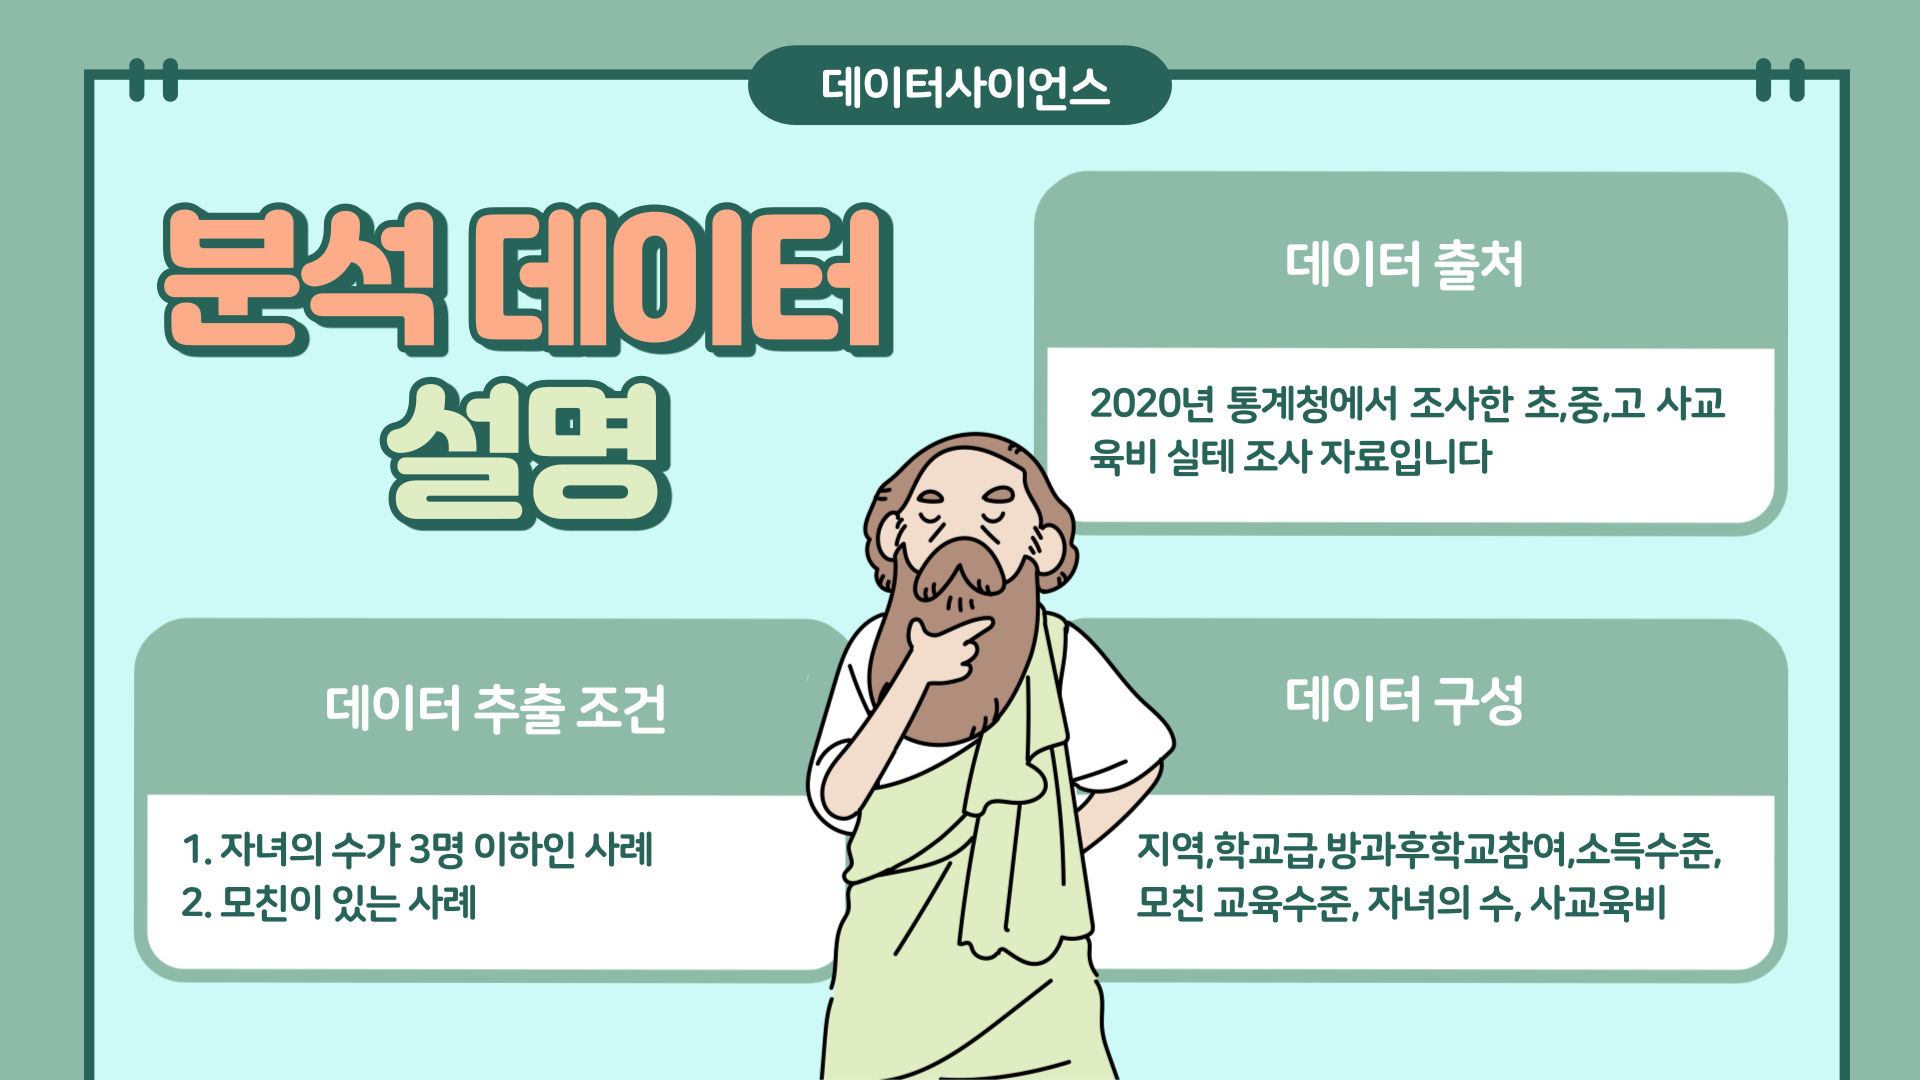

In [ ]:
# HIDDEN
from datascience import *
import numpy as np

import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
np.set_printoptions(threshold=50)

/usr/local/lib/python3.7/dist-packages/datascience/tables.py:17: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.7/dist-packages/datascience/util.py:10: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  


In [ ]:
data_table = Table.read_table('./data.csv')
data_table

admin,region,school,afterschool,avg_income,n_kid,m_ed,private
2,21,1,2,2000,1,1,0
4,35,2,2,2000,1,1,0
4,38,2,2,1000,1,1,0
1,11,2,2,2000,1,1,0
1,11,2,2,1000,1,1,0
1,11,4,2,1000,1,1,0
2,22,3,2,1000,1,1,0
2,23,1,1,2000,1,1,0
2,23,4,2,7000,1,1,0
2,24,1,2,1000,1,1,0


## 과제1. 평균소득과 방과후학교 참여도
+ 방과후학교에 참여하는 학생 집단과 방과후학교에 참여하지 않는 학생 집단을 비교하여 평균 소득과 방과후학교 참여 여부의 상관관계를 조사하고자 한다.
+ Null Hypothesis
 - 평균 소득과 방과후학교 참여도는 무관하다.

+ Alternative Hypothesis
 - 평균 소득이 낮을수록 방과후학교 참여도가 높다.

> ### 1) 데이터의 직관적 이해
------
+ 통계 분석을 위해 실제 데이터에서 방과후학교에 참여하는 집단의 평균 소득과 참여하지 않는 집단의 평균소득을 각각 구한다.

In [ ]:
avg_income = Table().with_columns('afterschool', data_table.column('afterschool'), 'avg_income', data_table.column('avg_income'))
means_table = avg_income.group('afterschool', np.mean)
means_table

afterschool,avg_income mean
1,4334.06
2,4630.13


+ 평균 값을 비교함과 동시에 히스토그램을 활용하여 두 집단의 실제 데이터 분포를 시각적으로 확인하여 데이터에 대한 직관적인 이해를 도모한다. 

/usr/local/lib/python3.7/dist-packages/datascience/tables.py:483: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array(tuple(values))
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


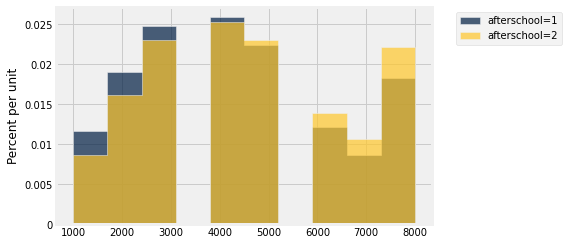

In [ ]:
avg_income.hist('avg_income', group = 'afterschool')

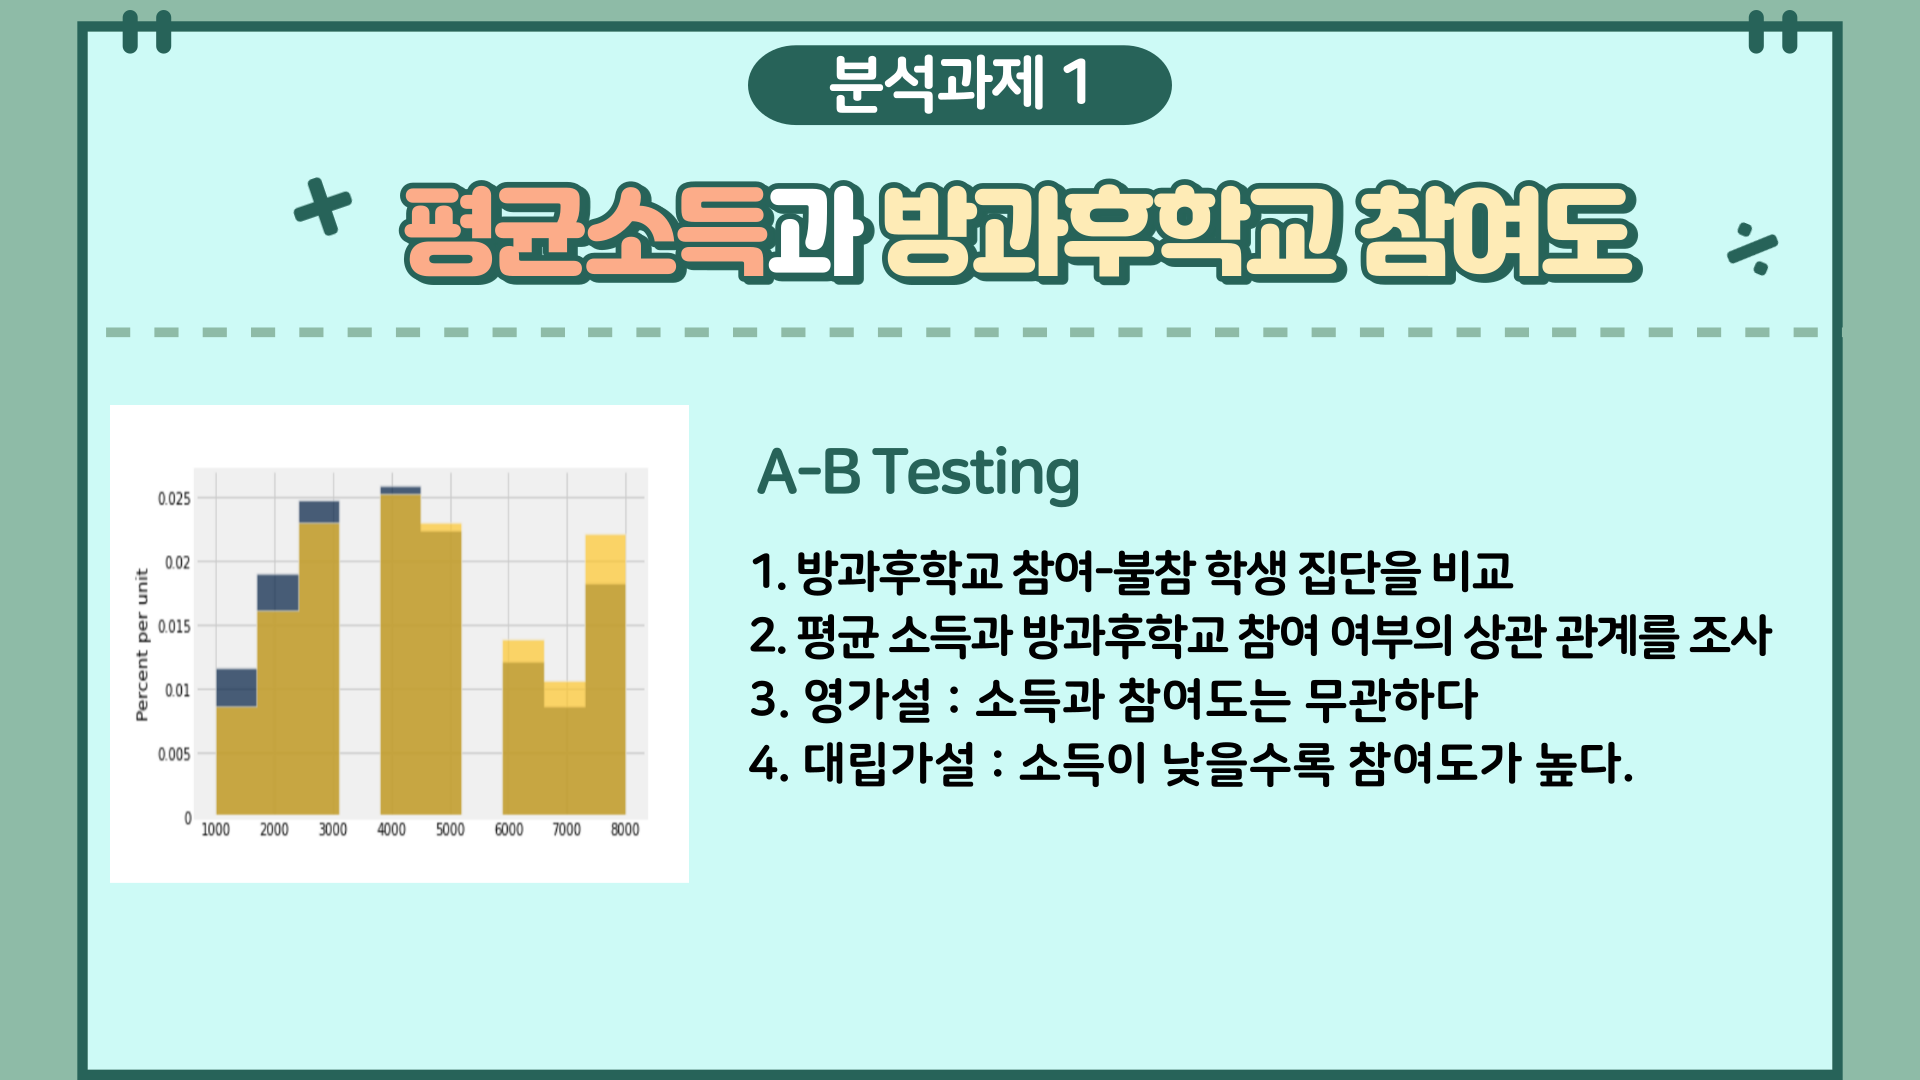

### 2) 가설 검증을 통한 상관관계 분석

+ 실제 관찰데이터로부터 계산한 두 집단의 평균값의 차이를 구하고 이를 무작위로 추출한 데이터 값과 통계학적으로 비교한다.

In [ ]:
means = means_table.column(1)
observed_difference = means.item(1) - means.item(0)
observed_difference

296.06673818219497

+ 소득 데이터를 무작위로 섞고 두 집단에 임의로 배치한 후 평균 값을 계산하여 차이를 구한다.

In [ ]:
shuffled_avg_income = avg_income.sample(with_replacement = False).column(1)
original_and_shuffled = avg_income.with_column('Shuffled Average Income', shuffled_avg_income)
original_and_shuffled

afterschool,avg_income,Shuffled Average Income
2,2000,4000
2,2000,4000
2,1000,2000
2,2000,7000
2,1000,8000
2,1000,2000
2,1000,8000
1,2000,4000
2,7000,2000
2,1000,8000


In [ ]:
shuffled_means = original_and_shuffled.group('afterschool', np.average).column(2)
difference = shuffled_means.item(1) - shuffled_means.item(0)
shuffled_means
difference

-6.122776802521912

+ 위의 과정(무작위 추출과 임의 배정 후 평균의 차를 계산)을 500번 반복 수행하여 실제 관찰 데이터와 비교할 가상의 데이터를 생성한다.
+ [주의!] 실제 데이터 사례가 많아서 실행하는데 시간이 많이 소요된다. 반복 수행횟수를 500회보다 늘린다면 더욱 정확한 통계 결과를 확인할 수 있다.

In [ ]:
# 주의! 실제 데이터 사례가 많아서 실행하는데 시간이 많이 소요됨.
# 5000회 실행시 35분~40분 소요됨. 신속한 분석을 위해 횟수를 500회로 줄여서 사용함.

def permuted_sample_average_difference(table, label, group_label, repetitions):
    
    tbl = table.select(group_label, label)
    
    differences = make_array()
    for i in np.arange(repetitions):
        shuffled = tbl.sample(with_replacement = False).column(1)
        original_and_shuffled = tbl.with_column('Shuffled Data', shuffled)

        shuffled_means = original_and_shuffled.group(group_label, np.average).column(2)
        simulated_difference = shuffled_means.item(1) - shuffled_means.item(0)
    
        differences = np.append(differences, simulated_difference)
    
    return differences   

repetition = 500
differences = permuted_sample_average_difference(data_table,'avg_income','afterschool' ,repetition)
differences

array([ -8.32552498,  15.76703317, -31.31670903, ..., -21.12899873,
       -26.91121269, -13.28170836])

+ 임의로 추출하여 계산한 데이터 집합과 실제 관찰 데이터의 분포를 비교,관찰하여 상관 관계를 통계학적으로 분석한다.
 - 양측검증을 위해 유의도(p-value)는 -/+ 0.025로 설정한다.
 - 임의의 데이터 집합의 분포를 히스토그램으로 표현한다. (종 모양의 정규분포와 유사함을 확인할 수 있다.)

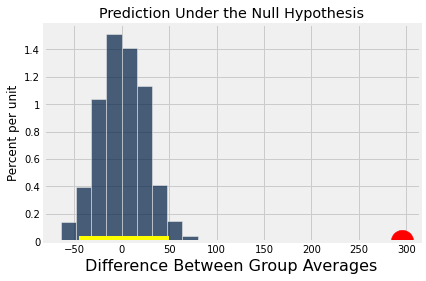

In [ ]:
left = percentile(2.5, differences)
right = percentile(97.5, differences)
(left, right)

Table().with_column('Difference Between Group Averages', differences).hist()
plots.title('Prediction Under the Null Hypothesis');
plots.plot(make_array(left, right), make_array(0, 0), color='yellow', lw=10, zorder=1)
plots.scatter(observed_difference, 0, color='red', s=500, zorder=2);

In [ ]:
empirical_P = np.count_nonzero(differences >= observed_difference) / repetition
empirical_P

0.0

**분석 결과**
______
+ 유의도의 범위를 크게 벗어나고 있기 때문에 관찰데이터는 임의로 추출한 데이터와 다르다.
+ 따라서, '평균 소득과 방과후학교 참여도는 무관하다'라는 영가설을 기각하고 '평균 소득이 낮을수록 방과후학교 참여도가 높다'라는 대립가설을 채택한다.
+ 즉, 방과후학교 프로그램에 참여하는 집단의 평균 소득이 참여하지 않는 집단의 평균 소득보다 통계학적으로 유의미하게 낮음을 알 수 있다.

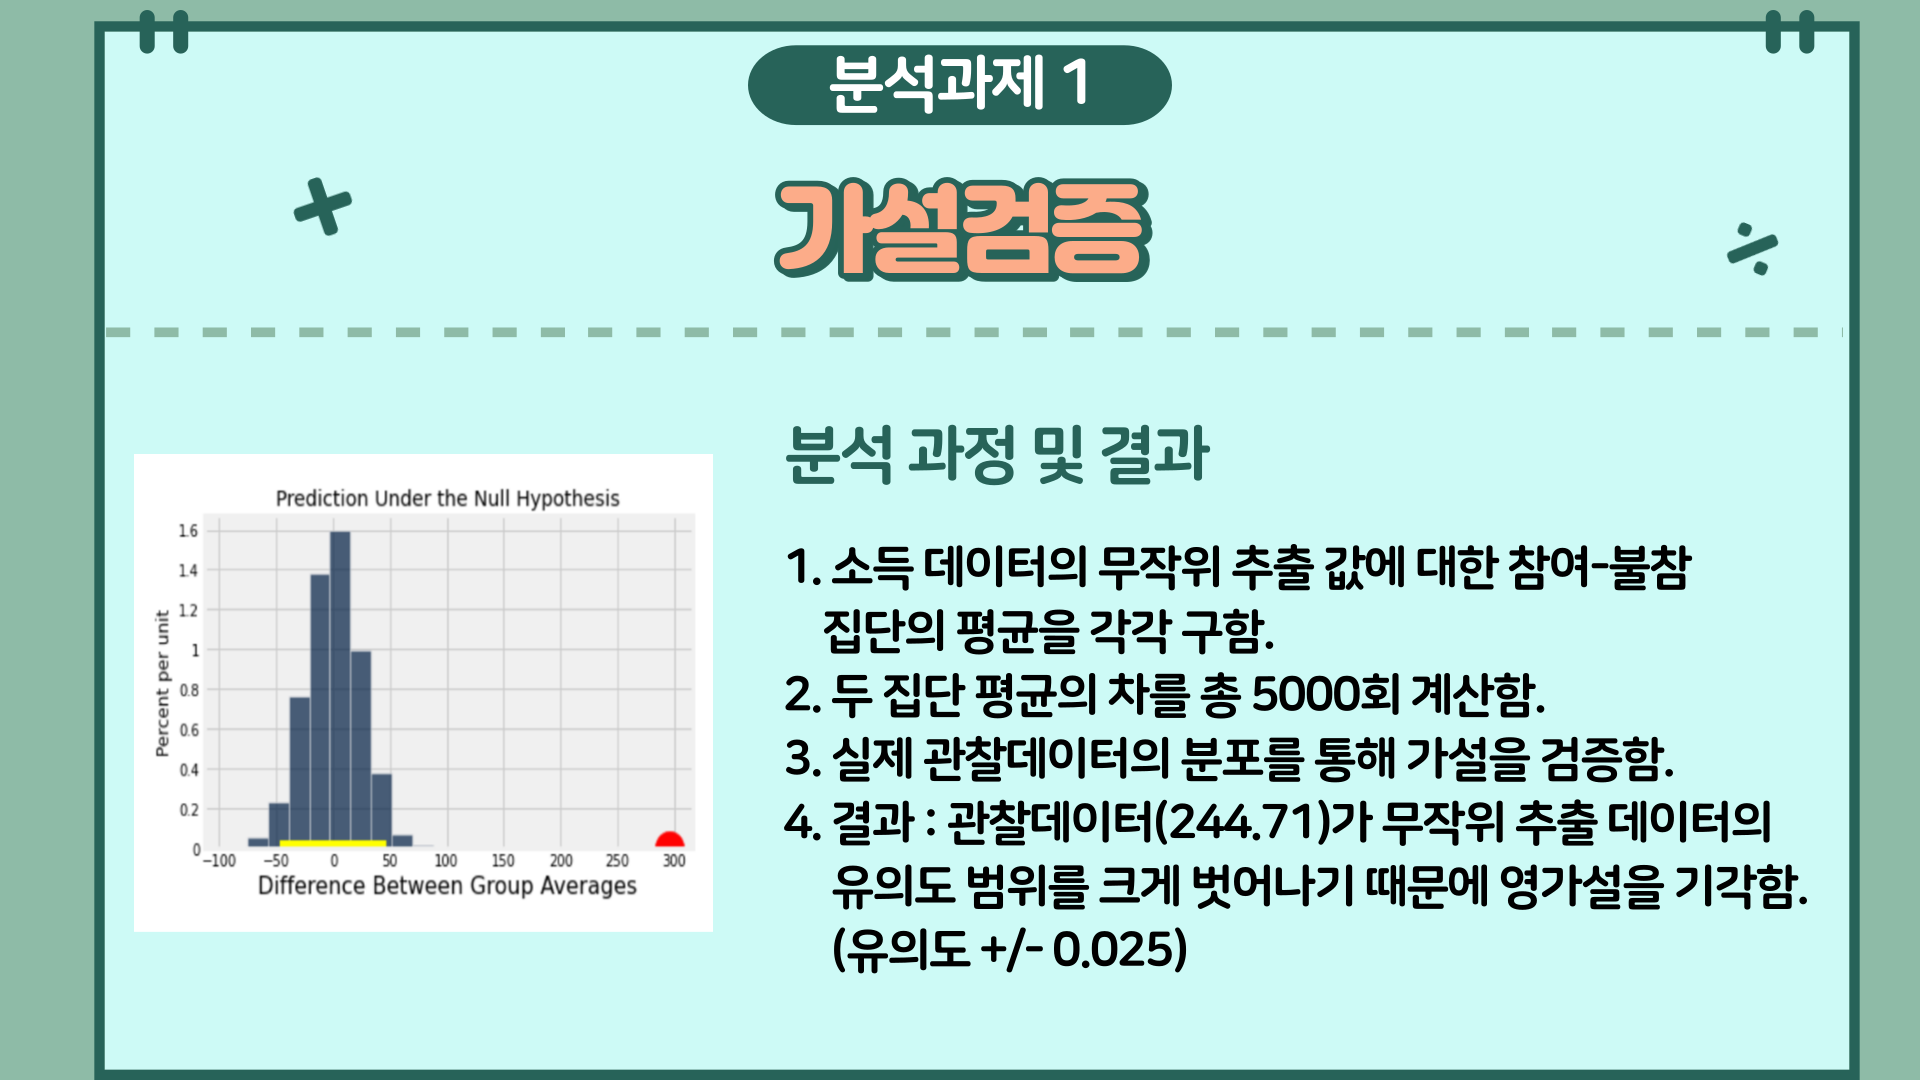

### 3) The Big Simulation
______
+ 통계 분석 결과의 정확도를 확인하기 위해 위의 검증 과정을 10회 반복 시행한다.
+ 반복 시행횟수를 최대한 늘리는 것이 바람직하지만 1회 시행시 3~4분 정도 소요되기 때문에 10회만 시행한다.
+ 10회 반복 시행한 결과값 집합의 분포에 실제 관찰 데이터 값을 위치시켜서 비교,검증한다.


In [ ]:
left_ends = make_array()
right_ends = make_array()
simulation_rep = 10
 
for i in np.arange(simulation_rep): 
    differences = permuted_sample_average_difference(data_table,'avg_income','afterschool',500)
    left_ends = np.append(left_ends, percentile(2.5, differences))
    right_ends = np.append(right_ends, percentile(97.5, differences))
 
intervals = Table().with_columns(
    'Left', left_ends,
    'Right', right_ends
)

intervals

Left,Right
-49.4894,51.2863
-47.2866,47.9822
-56.373,50.8733
-50.4531,51.5617
-46.8736,49.6343
-42.0551,51.837
-50.5908,50.7357
-49.3517,45.5041
-48.6634,48.6706
-48.6634,48.2576


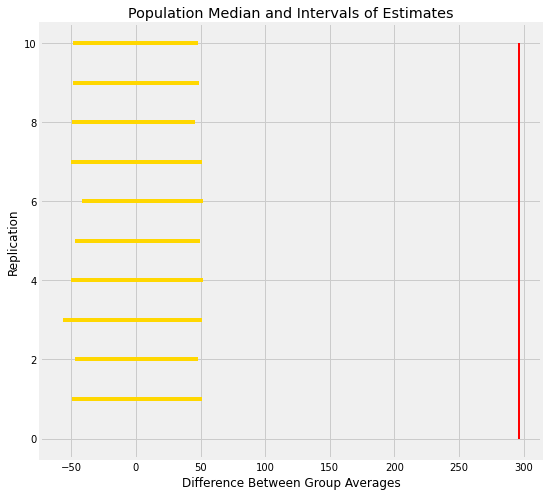

In [ ]:
# HIDDEN 

plots.figure(figsize=(8,8))
for i in np.arange(simulation_rep):
    ends = intervals2.column(i)
    plots.plot(ends, make_array(i+1, i+1), color='gold')
plots.plot(make_array(observed_difference, observed_difference), make_array(0, simulation_rep), color='red', lw=2)
plots.xlabel('Difference Between Group Averages')
plots.ylabel('Replication')
plots.title('Population Median and Intervals of Estimates');

## 과제2. 평균소득과 사교육비

> ###  1) 정규화와 상관관계

+ 실제 데이터 중 '평균소득'과 '사교육비'의 상관관계를 시각화하기 위해 산포도(scatter) 차트를 활용한다.

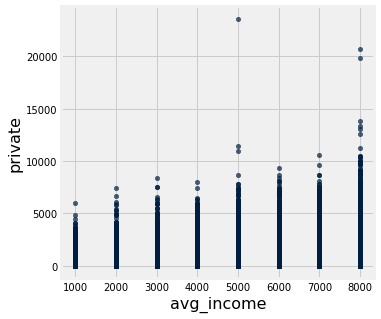

In [ ]:
data_table.scatter( 'avg_income','private')

+ 회귀분석에 활용할 데이터를 표준단위(standard units)로 정규화하기 위해 standard_units 함수를 선언한다.

In [ ]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)  


+ 실제 데이터를 표준단위로 정규화한다.

In [ ]:
t_su = Table().with_columns(
        'x (standard units)', standard_units(data_table.column('avg_income')),
        'y (standard units)', standard_units(data_table.column('private'))
    )
t_su

x (standard units),y (standard units)
-1.22704,-0.833963
-1.22704,-0.833963
-1.70005,-0.833963
-1.22704,-0.833963
-1.70005,-0.833963
-1.70005,-0.833963
-1.70005,-0.833963
-1.22704,-0.833963
1.13797,-0.833963
-1.70005,-0.833963


+ 두 변수의 선형성 정도를 측정하는 선형계수(correlation)을 계산하기 위해 두 변수의 표준단위를 곱한다.

In [ ]:
t_product = t_su.with_column('product of standard units', t_su.column(0) * t_su.column(1))
t_product

x (standard units),y (standard units),product of standard units
-1.22704,-0.833963,1.02331
-1.22704,-0.833963,1.02331
-1.70005,-0.833963,1.41778
-1.22704,-0.833963,1.02331
-1.70005,-0.833963,1.41778
-1.70005,-0.833963,1.41778
-1.70005,-0.833963,1.41778
-1.22704,-0.833963,1.02331
1.13797,-0.833963,-0.949022
-1.70005,-0.833963,1.41778


+ 두 변수의 표준단위를 곱한 값의 평균이 선형계수(correlation, r)이다.
+ 두 변수의 선형계수는 0.3454138...로 두 변수 사이에는 양의 선형 관계가 있음을 확인할 수 있다.

In [ ]:
r = np.mean(t_product.column(2))
r

0.34541383111481794

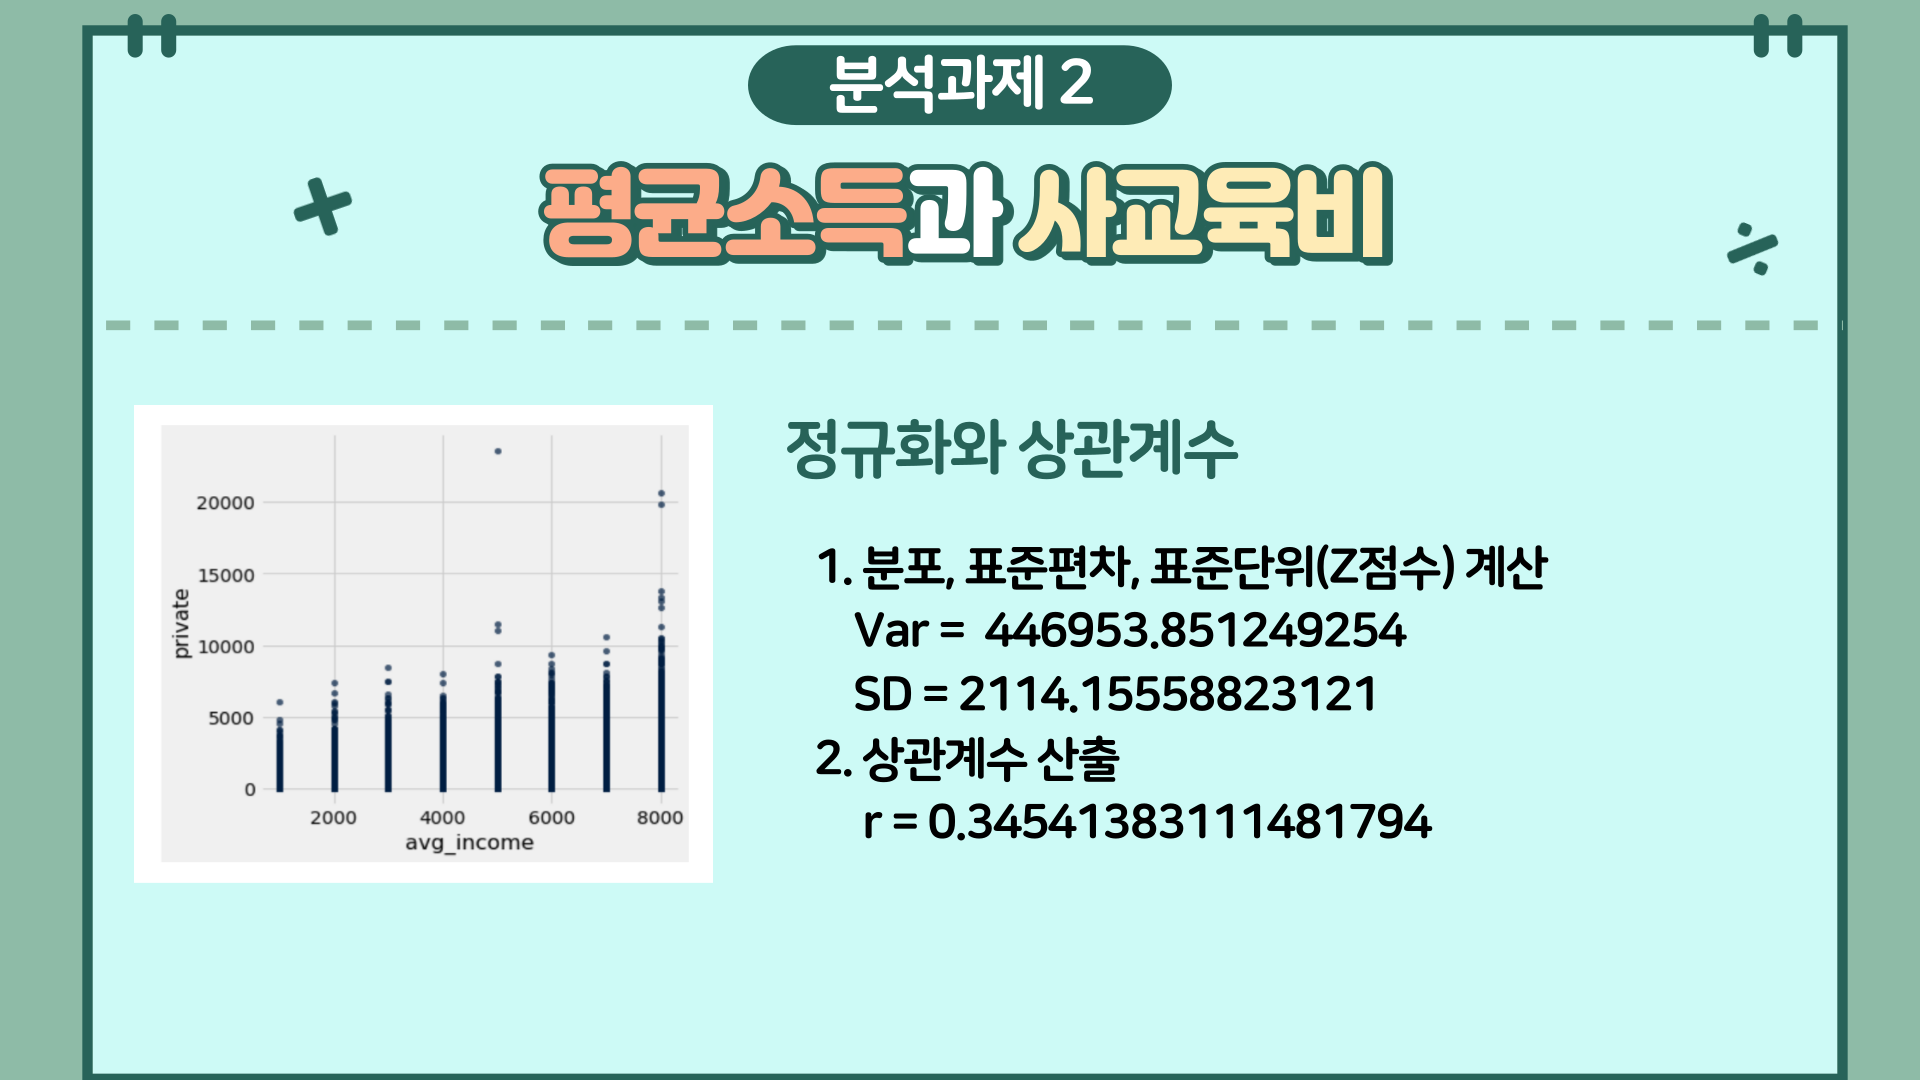

> ### 2) 선형회귀분석을 통한 예측

+ 위에서 구한 상관계수를 활용하여 다음의 수식으로  회귀  직선의 기울기(slope)와 절편(intercept)를 구할 수 있다.
 - slope = $r \frac{\sigma_y}{\sigma_x}$
 - intercept = $\mu_y - slope \cdot \mu_x$
+ 상관계수, 회귀직선의 기울기 및 절편을 계산하는 함수를 각각 선언한다.

In [ ]:
def correlation(t, label_x, label_y):
    return np.mean(standard_units(t.column(label_x))*standard_units(t.column(label_y)))

def slope(t, label_x, label_y):
    r = correlation(t, label_x, label_y)
    return r*np.std(t.column(label_y))/np.std(t.column(label_x))

def intercept(t, label_x, label_y):
    return np.mean(t.column(label_y)) - slope(t, label_x, label_y)*np.mean(t.column(label_x))

+ 평균소득과 사교육비에 대한 실제 데이터의 상관계수로부터 계산된 회귀 직선의 기울기와 절편은 각각 0.19007294954326262와 96.9811485759052이다.

In [ ]:
edu_slope = slope(data_table, 'avg_income','private')
edu_intercept = intercept(data_table, 'avg_income','private')
edu_slope, edu_intercept

(0.19007294954326262, 96.9811485759052)

+ 회귀 직선 방정식으로 각 데이터에 대한 예측값을 계산하고 이를 시각화한다.

In [ ]:
edu_table = Table().with_columns(
    'avg_income', data_table.column('avg_income'),
    'private', data_table.column('private'))

edu_with_predictions = edu_table.with_column(
    'Linear Prediction', edu_slope*data_table.column('avg_income') + edu_intercept
)
edu_with_predictions

avg_income,private,Linear Prediction
2000,0,477.127
2000,0,477.127
1000,0,287.054
2000,0,477.127
1000,0,287.054
1000,0,287.054
1000,0,287.054
2000,0,477.127
7000,0,1427.49
1000,0,287.054


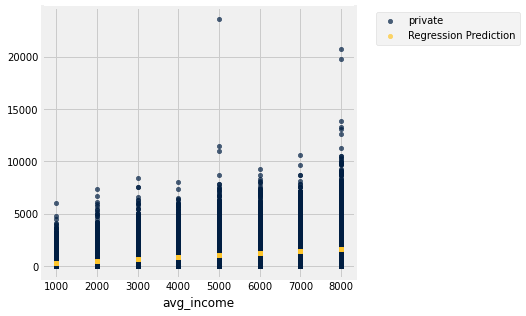

In [ ]:
edu_with_predictions.scatter('avg_income')

+ 회귀 직선 방정식을 통해 계산된 예측값의 분포와 'fit_line' 메소드로 생성한 회귀 직선이 일치함을 확인할 수 있다.

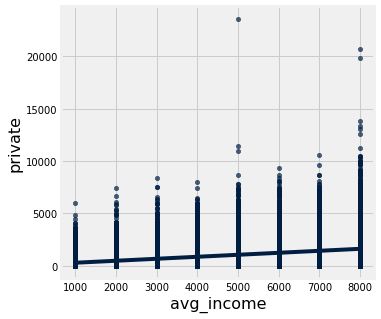

In [ ]:
edu_table.scatter('avg_income', fit_line=True)

**분석 결과**
_______
+ 소득과 무관하게 기본적으로 97만원이라는 비교적 큰 금액을 사교육비로 지출하고 있다.**(절편)**
+ 평균소득이 100만원 증가할 때마다 사교육비는 19만원씩 증가한다.**(기울기)**
+ 사교육을 통해 학력을 신장하고자 하는 경향성이 존재함을 통계학적으로 확인할 수 있다.

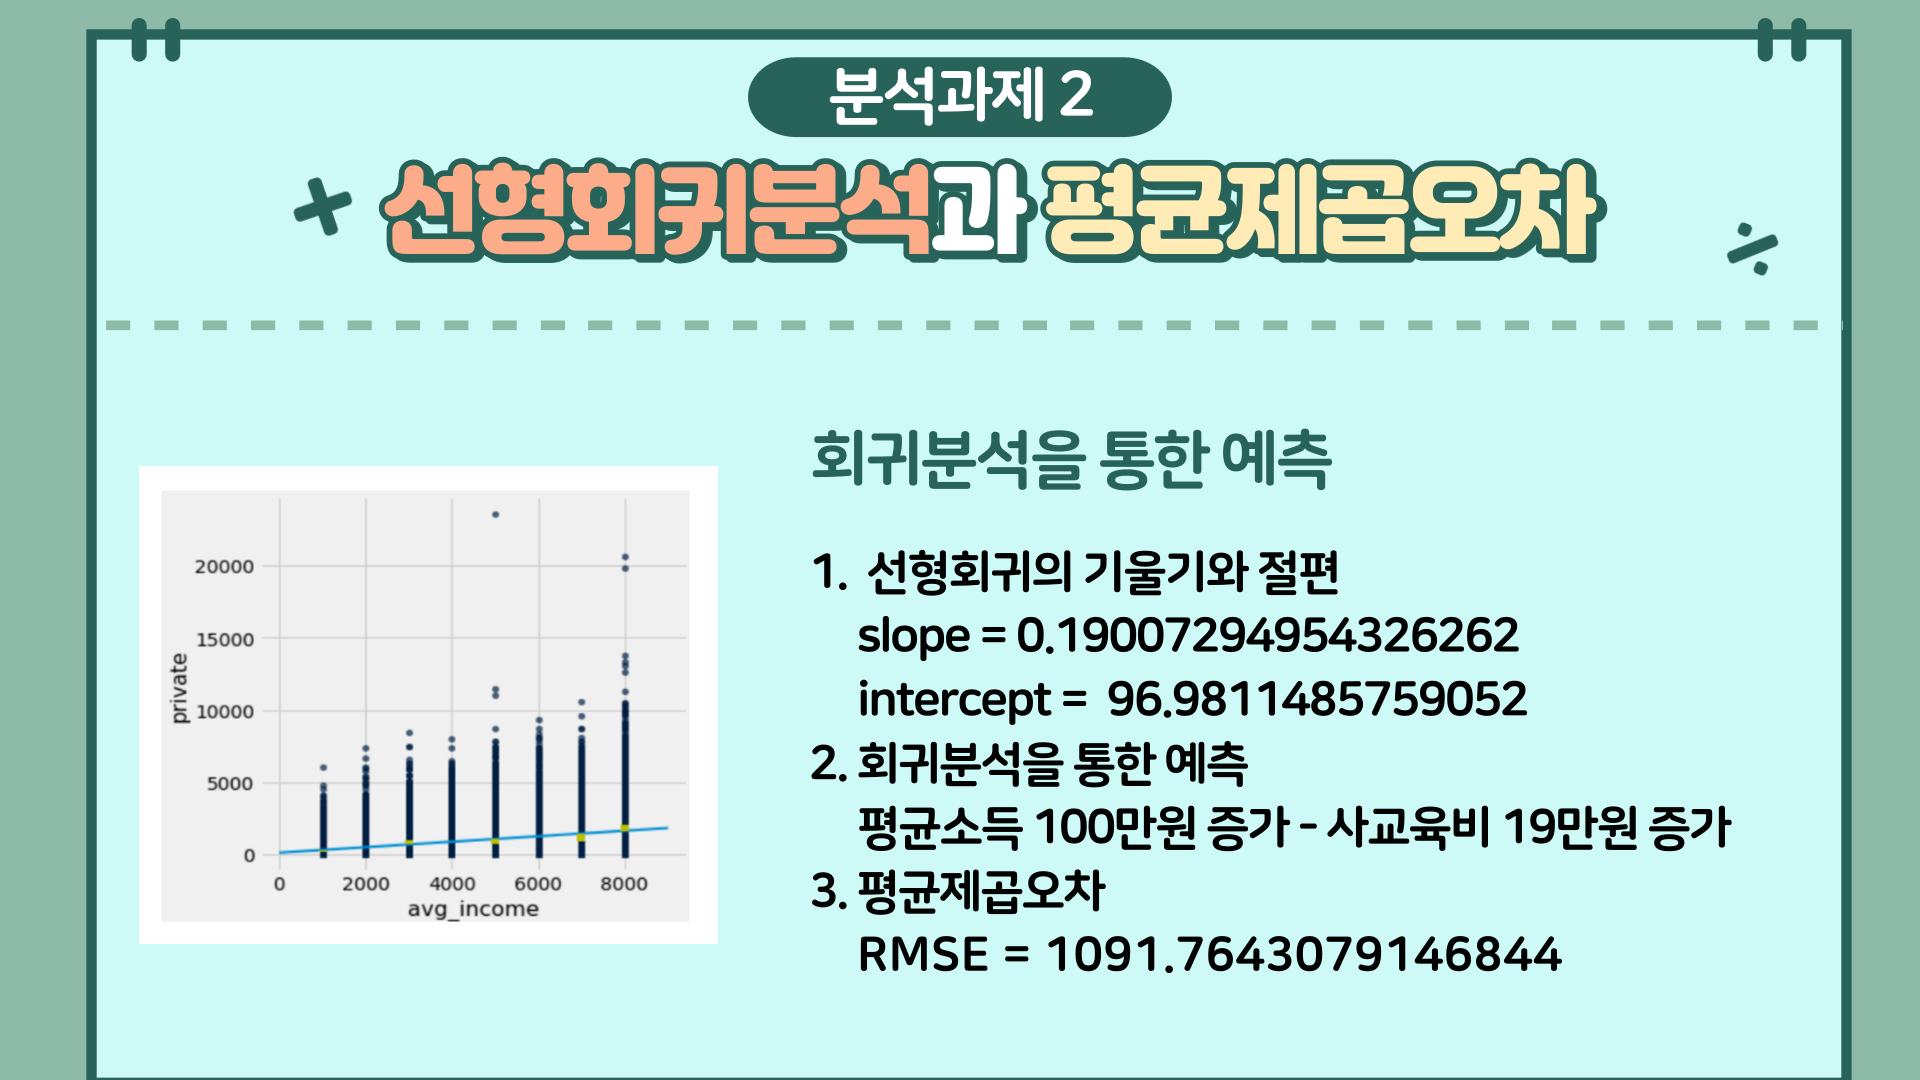

> ### 3) 평균제곱오차

+ 각 데이터에 대해 예측한 값과 실제 값의 차이인 오차(error)를 구한다.

In [ ]:
actual = edu_with_predictions.column('private')
predicted = edu_with_predictions.column('Linear Prediction')
errors = actual - predicted

In [ ]:
edu_with_predictions.with_column('Error', errors)

avg_income,private,Linear Prediction,Error
2000,0,477.127,-477.127
2000,0,477.127,-477.127
1000,0,287.054,-287.054
2000,0,477.127,-477.127
1000,0,287.054,-287.054
1000,0,287.054,-287.054
1000,0,287.054,-287.054
2000,0,477.127,-477.127
7000,0,1427.49,-1427.49
1000,0,287.054,-287.054


+ matplotlib의 plot을 사용하여 오차를 다음과 같이 시각화할 수 있다.

In [ ]:
sample = ([1000, 200],[3000, 1000],[5000, 700],[7000, 900],[8000, 2000])
def edu_errors(slope, intercept):
    edu_table.scatter('avg_income', 'private')
    xlims = np.array([0, 9000])
    plots.plot(xlims, slope * xlims + intercept, lw=2)
    for x, y in sample:
        plots.plot([x, x], [y, slope * x + intercept], color='y', lw=6)

Slope of Regression Line:     0.0
Intercept of Regression Line: 97.0


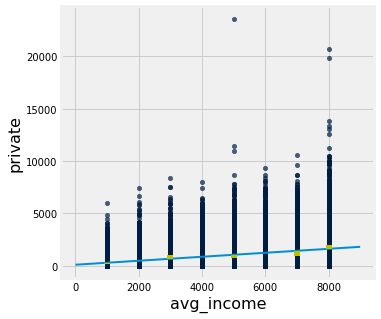

In [ ]:
print('Slope of Regression Line:    ', np.round(edu_slope))
print('Intercept of Regression Line:', np.round(edu_intercept))
edu_errors(edu_slope, edu_intercept)


+ 회귀 직선이 아닌 임의의 직선에서는 오차가 더욱 커짐을 확인할 수 있다.

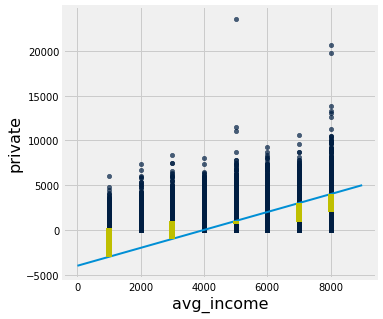

In [ ]:
edu_errors(1, -4000)

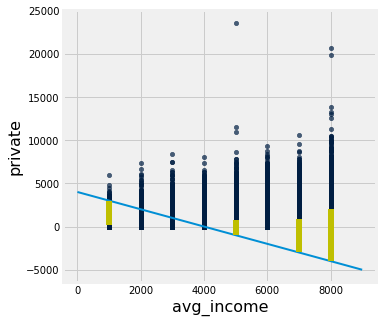

In [ ]:
edu_errors(-1, 4000)

+ 각 데이터와 예측값 사이의 오차의 절대값에 대한 평균인 RMSE(Root Mean Squared Error)를 계산하여 회귀 직선의 정확도를 측정할 수 있다.

In [ ]:
def edu_rmse(slope, intercept):
    edu_errors(slope, intercept)
    x = edu_table.column('avg_income')
    y = edu_table.column('private')
    fitted = slope * x + intercept
    mse = np.mean((y - fitted) ** 2)
    print("Root mean squared error:", mse ** 0.5)

+ 상관계수를 활용하여 산출한 회귀직선의 RMSE는 1091.7643...이다.
+ 임의로 설정한 회귀직선의 RMSE의 값이 휠씬 더 크다.

Root mean squared error: 1091.7643079146844


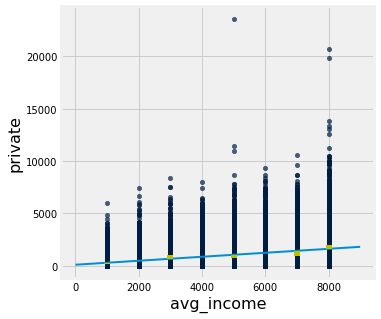

In [ ]:
edu_rmse(edu_slope,edu_intercept)

Root mean squared error: 2065.2775305036016


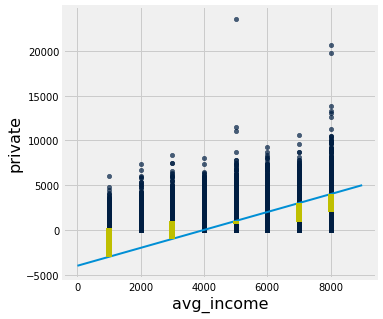

In [ ]:
edu_rmse(1, -4000)

Root mean squared error: 3157.4436556798446


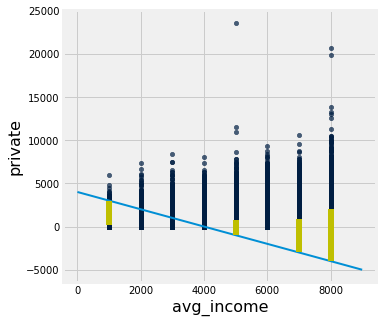

In [ ]:
edu_rmse(-1, 4000)

> ### 4) 최소자승 회귀분석

+ minimize함수를 이용하면 회귀직선의 RMSE가 최소제곱합 오류인지를 확인할 수 있다.

In [ ]:
def edu_linear_mse(any_slope, any_intercept):
    x = edu_table.column('avg_income')
    y = edu_table.column('private')
    fitted = any_slope*x + any_intercept
    return np.mean((y - fitted) ** 2)

In [ ]:
minimize(edu_linear_mse)

array([ 0.19007295, 96.98114449])

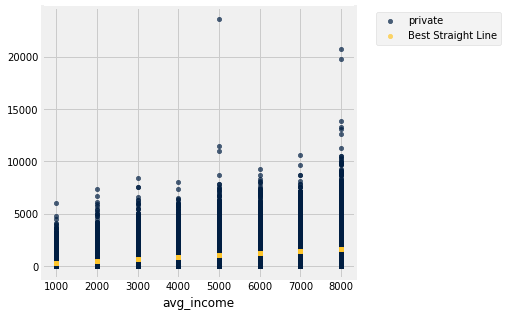

In [ ]:
def fit(table, x, y):
    """Return the height of the regression line at each x value."""
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * table.column(x) + b

fitted = fit(edu_table, 'avg_income', 'private')
edu_table.with_column('Best Straight Line', fitted).scatter('avg_income')


> ### 5) 2차 함수 기반 회귀분석

+ 두 변수의 상관관계를 보다 정확하게 측정하기 위해 2차 함수 기반 회귀분석을 실시한다.

In [ ]:
def edu_quadratic_mse(a, b, c):
    x = edu_table.column('avg_income')
    y = edu_table.column('private')
    fitted = a*(x**2) + b*x + c
    return np.mean((y - fitted) ** 2)


In [ ]:
best = minimize(edu_quadratic_mse)
best

array([1.36301292e-05, 5.48492725e-02, 3.73706056e+02])

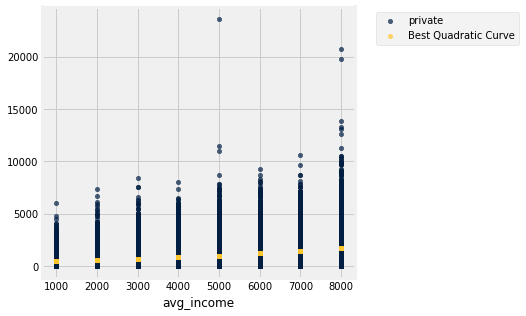

In [ ]:
x = edu_table.column(0)
edu_fit = best.item(0)*(x**2) + best.item(1)*x + best.item(2)
edu_table.with_column('Best Quadratic Curve', edu_fit).scatter(0)

**2차 함수 회귀 분석 결과**
________
+ 선형 계수를 사용해서 도출한 회귀직선과 시각적으로 큰 차이를 보이지는 않는다.
+ 하지만 2차 함수 회귀 분석을 통해 더욱 정교한 상관관계를 확인할 수 있다.

## **최종 결론 및 시사점**
_______
+ **결론1** : 소득격차와 방과후학교 프로그램 참여도의 상관관계를 분석함으로써 방과후학교 프로그램에 참여하는 집단의 평균소득이 참여하지 않는 집단의 평균소득보다 통계학적으로 유의미하게 낮다.
+ **결론2** : 평균소득과 사교육비의 상관관계를 선형회귀와 평균제곱오차를 사용하여 통계학적으로 분석함으로써 모든 소득 계층에서 많은 비용을 사교육비로 지출하고 있고(절편: 약 97만원) 소득 증가에 비례해서(기울기: 약 0.19) 사교육비 지출이 증가하고 있다.
+ **시사점** : 공교육에 참여도가 높은 집단의 소득 수준이 낮고 사교육을 통해 학력을 신장하고자 하는 경향성이 뚜렷하다. 효과적인 교육정책을 수립하여 공교육을 통해 학력을 신장시킬 수 있다는 확신을 갖게 한다면 공교육 참여도는 각 개인의 소득수준과 무관할 것이며 소득 증가에 비례해서 사교육비 지출의 증가하지도 않을 것이다. 따라서, 지금까지 시행된 공교육 기반 교육격차 완화 정책은 성공적이라고 볼 수 없다. 

## **개선할 사항**
_______
+ 각 개인의 소득수준, 사교육비 지출, 방과후학교 참여도라는 데이터만으로 교육 정책의 성공 여부를 심층적으로 분석할 수 없다.
+ 후속 분석 활동에서는 본 과제에서 활용한 데이터와 함께 학생 학업성취도의 변화도를 측정한 데이터를 추가로 확보하여 각 변수와 학생 학업성취도 간의 상관 관계를 통계학적으로 분석함으로써 지금의 공교육 환경이 학생들의 학업 격차를 완화하는데 얼마나 통계학적으로 유의미한 도움을 주고 있는지 확인하도록 한다.

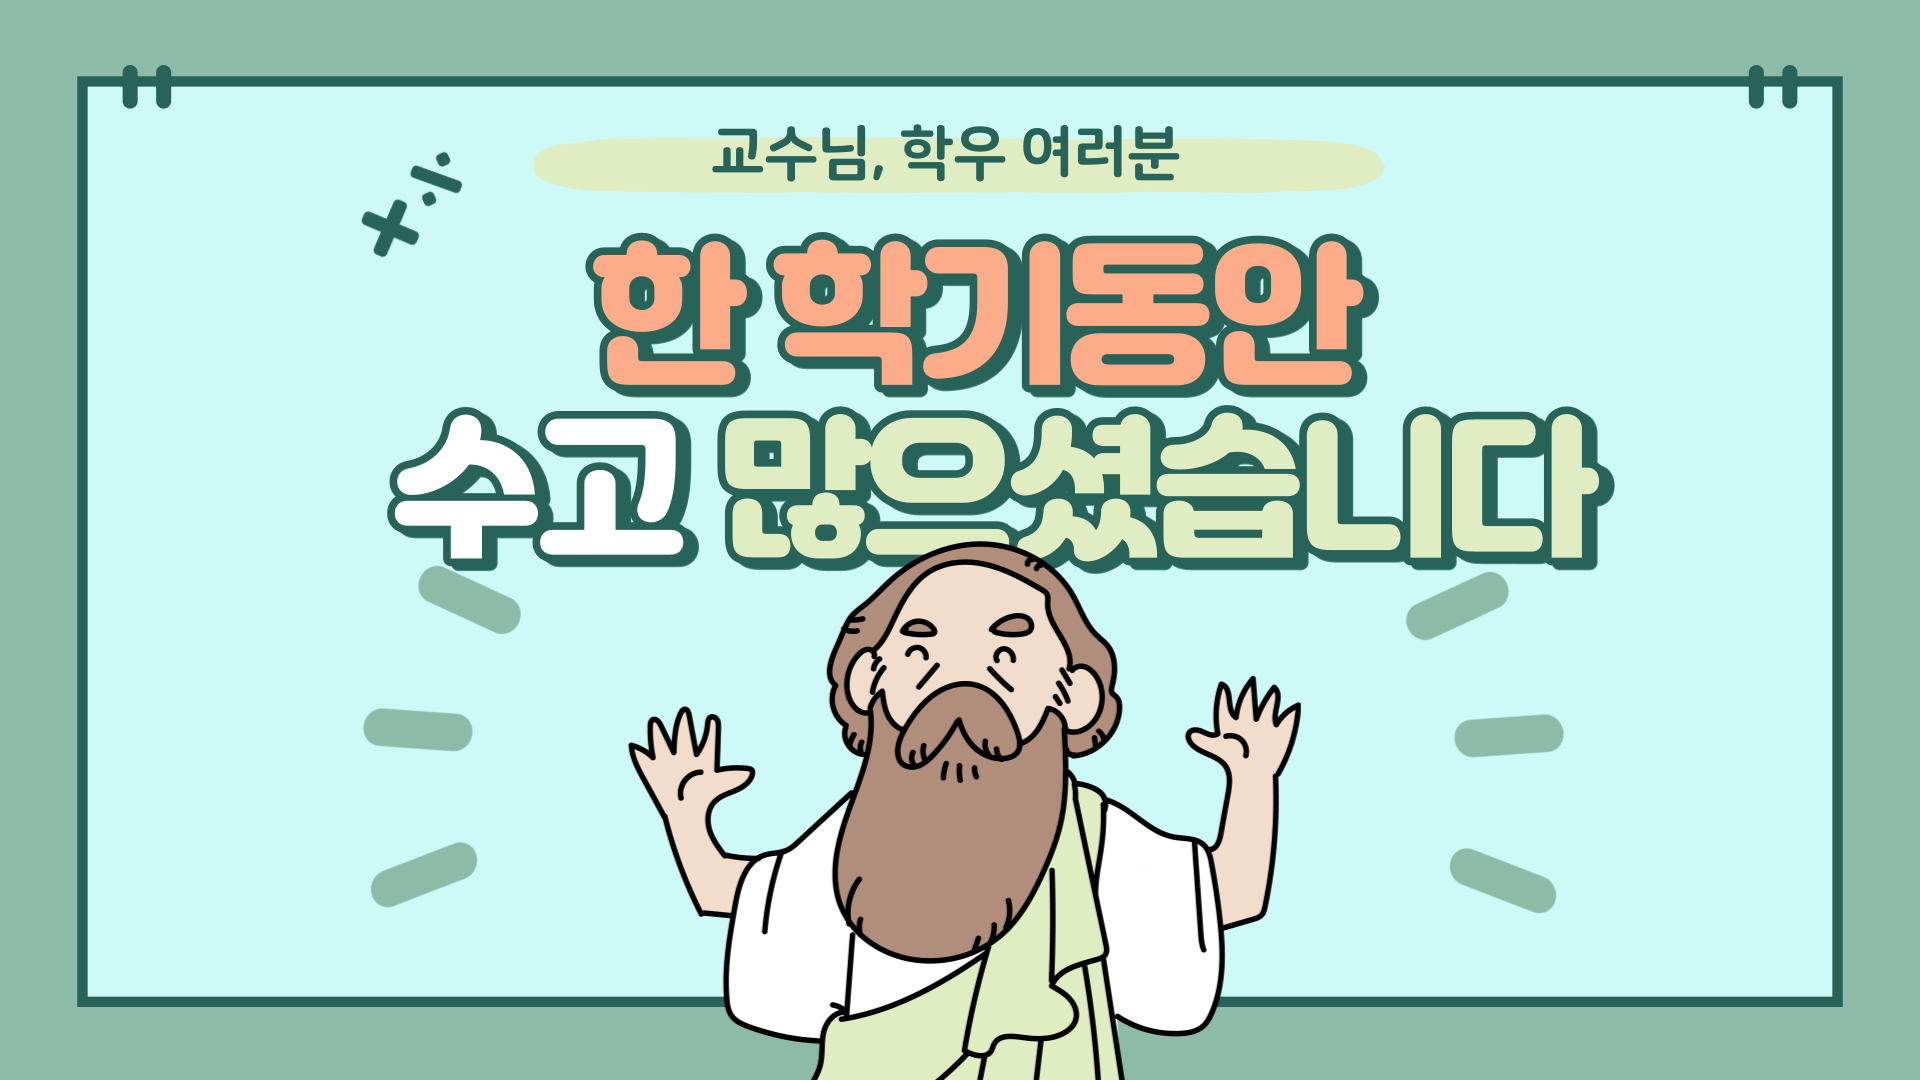